<a href="https://colab.research.google.com/github/ashishkumar1232/Machine_learning_projects/blob/main/Medical_insurance_cost_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
# importing the necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
insurance_data=pd.read_csv('/content/insurance.csv')

In [3]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
insurance_data.shape

(1338, 7)

In [7]:
insurance_data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
sns.set()

<Axes: xlabel='age', ylabel='count'>

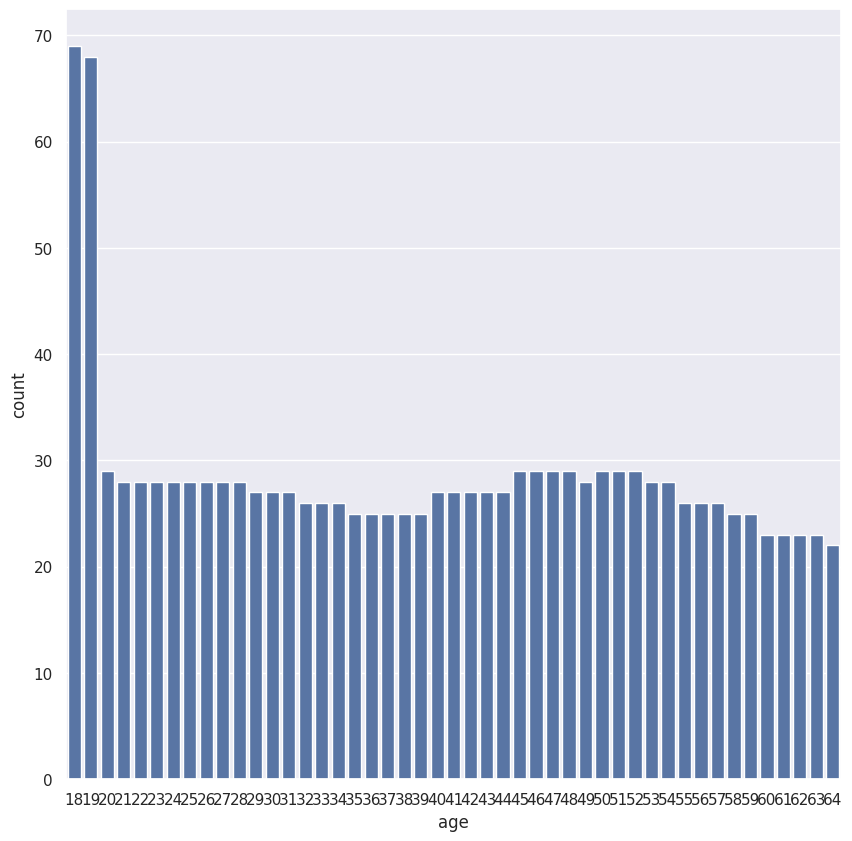

In [10]:
plt.figure(figsize=(10,10))
sns.countplot(x='age',data=insurance_data)

<Axes: xlabel='sex', ylabel='count'>

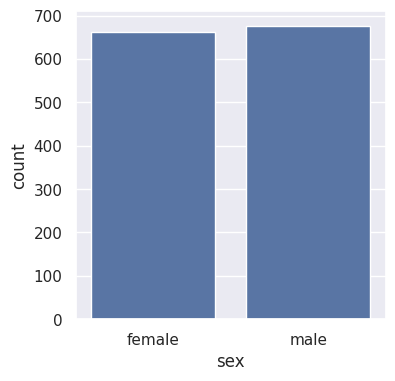

In [11]:
plt.figure(figsize=(4,4))
sns.countplot(x='sex',data=insurance_data)

<Axes: xlabel='smoker', ylabel='count'>

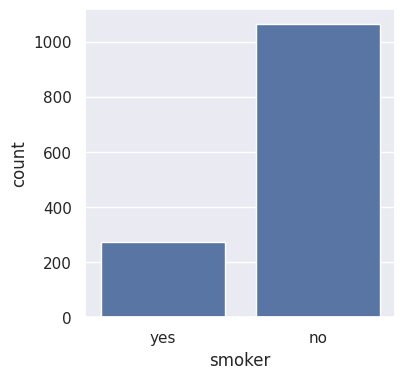

In [12]:
plt.figure(figsize=(4,4))
sns.countplot(x='smoker',data=insurance_data)

<Axes: xlabel='region', ylabel='count'>

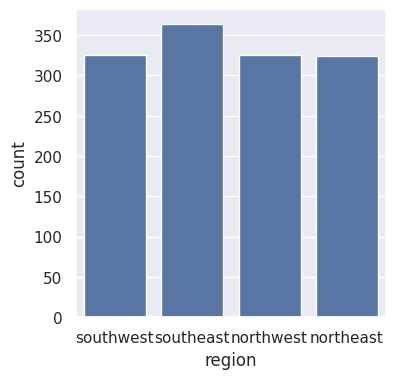

In [13]:
plt.figure(figsize=(4,4))
sns.countplot(x='region',data=insurance_data)

In [14]:
insurance_data['sex'].value_counts()

,count
sex,
male,676
female,662


In [19]:
insurance_data['smoker'].value_counts()


,count
smoker,
no,1064
yes,274


In [20]:
# replacing the values
insurance_data.replace({'sex':{'male':1,'female':0}},inplace=True)
insurance_data.replace({'smoker':{'yes':1,'no':0}},inplace=True)
insurance_data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

<ipython-input-20-4dca165396c4>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_data.replace({'sex':{'male':1,'female':0}},inplace=True)
<ipython-input-20-4dca165396c4>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_data.replace({'smoker':{'yes':1,'no':0}},inplace=True)
<ipython-input-20-4dca165396c4>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future

In [21]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [22]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [23]:
# separating the data in x and y
x=insurance_data.drop(columns='charges',axis=1)
y=insurance_data['charges']

In [24]:
# separating the data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [25]:
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [29]:
# model training
regressor=LinearRegression()

In [30]:
regressor.fit(x_train,y_train)

LinearRegression()

In [32]:
# predicting the value
x_train_pred=regressor.predict(x_train)

# error on the prediction
r2_train=metrics.r2_score(y_train,x_train_pred)
print('R squared error :',r2_train)

R squared error : 0.751505643411174


In [33]:
# prediction on the test data
x_test_pred=regressor.predict(x_test)

# error on the prediction
r2_test=metrics.r2_score(y_test,x_test_pred)
print('R squared error :',r2_test)

R squared error : 0.7447273869684076


In [36]:
# making the predictive model
input=(18,1,33.770,1,0,0)
# input data to numpy array
input_as_numpy=np.asarray(input)
# reshaping the input data
input_reshaped=input_as_numpy.reshape(1,-1)
# prediction
prediction=regressor.predict(input_reshaped)
print(prediction)


[3701.06157802]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
